<a href="https://colab.research.google.com/github/celsoneto2002/Projeto_Extensionista_Individual_Topicos_Big_Data_2025/blob/main/C%C3%B3digo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

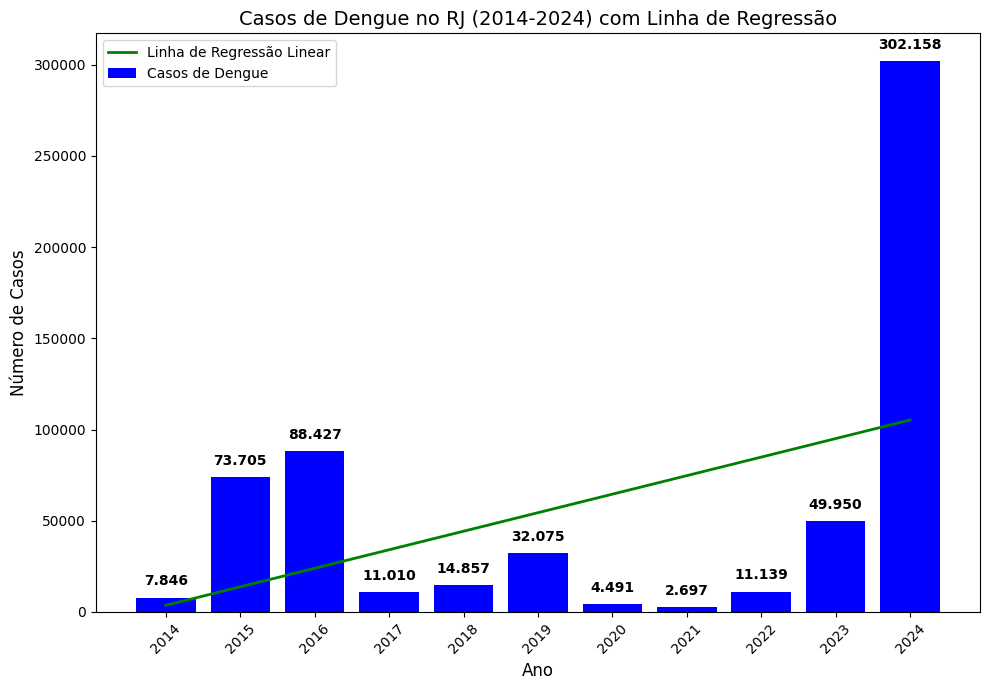

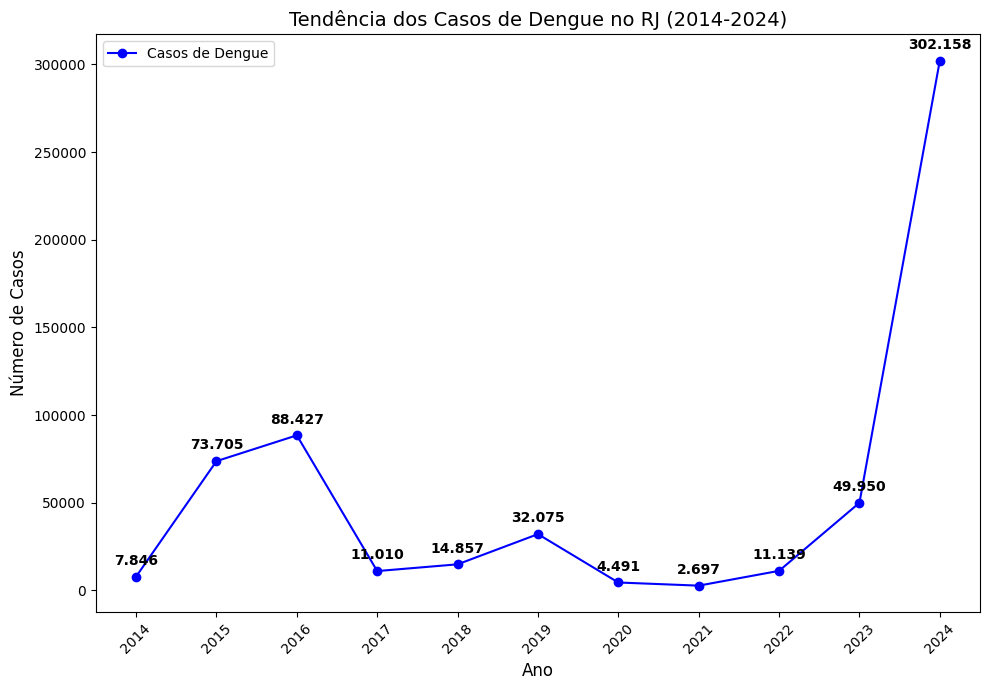

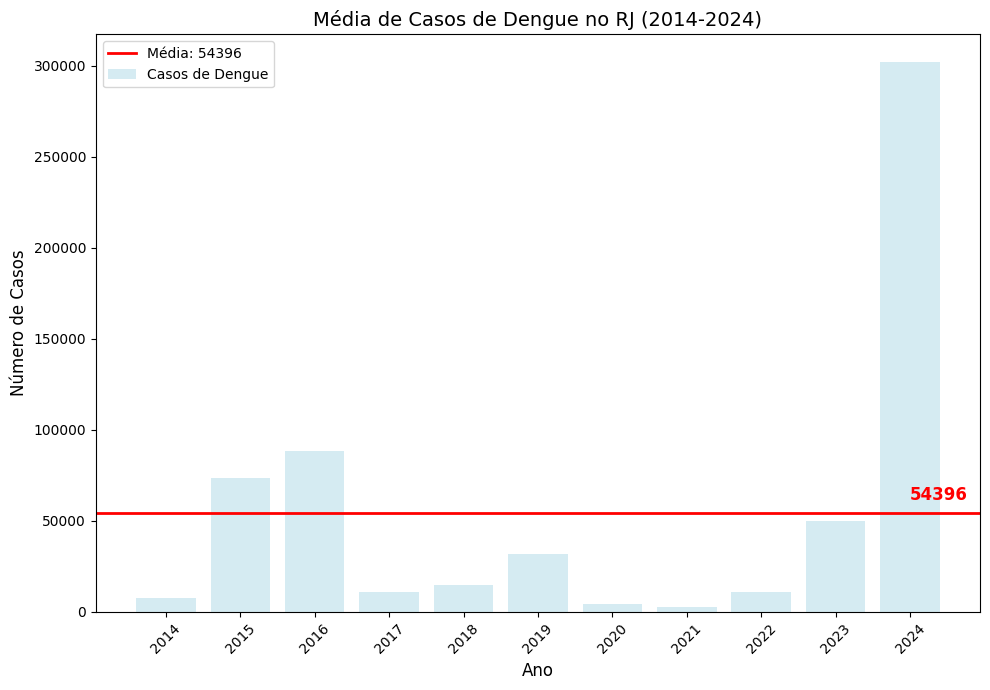

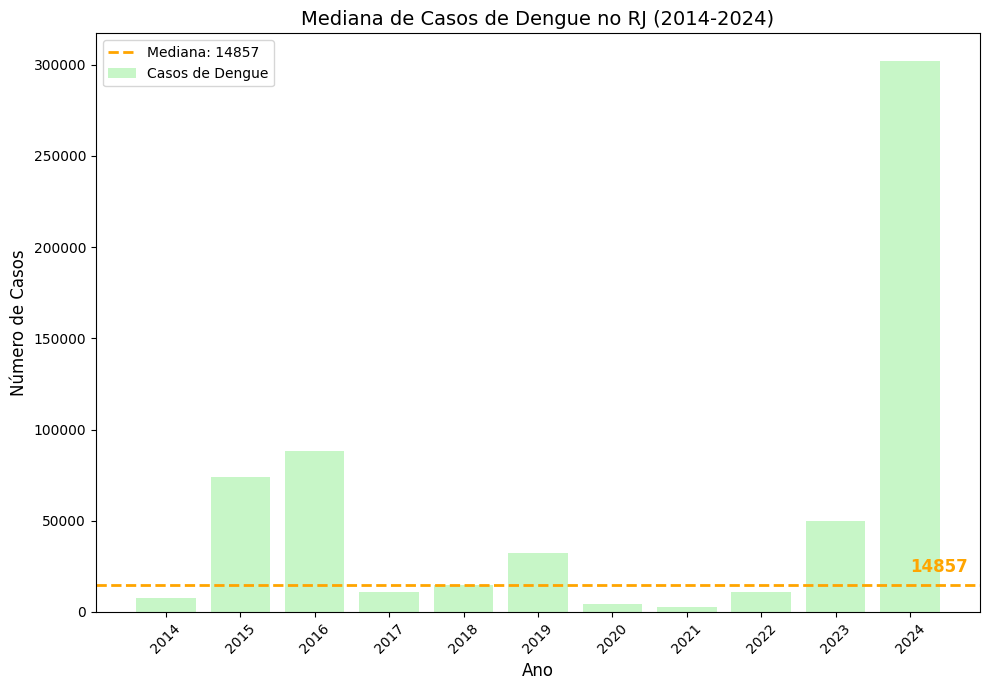

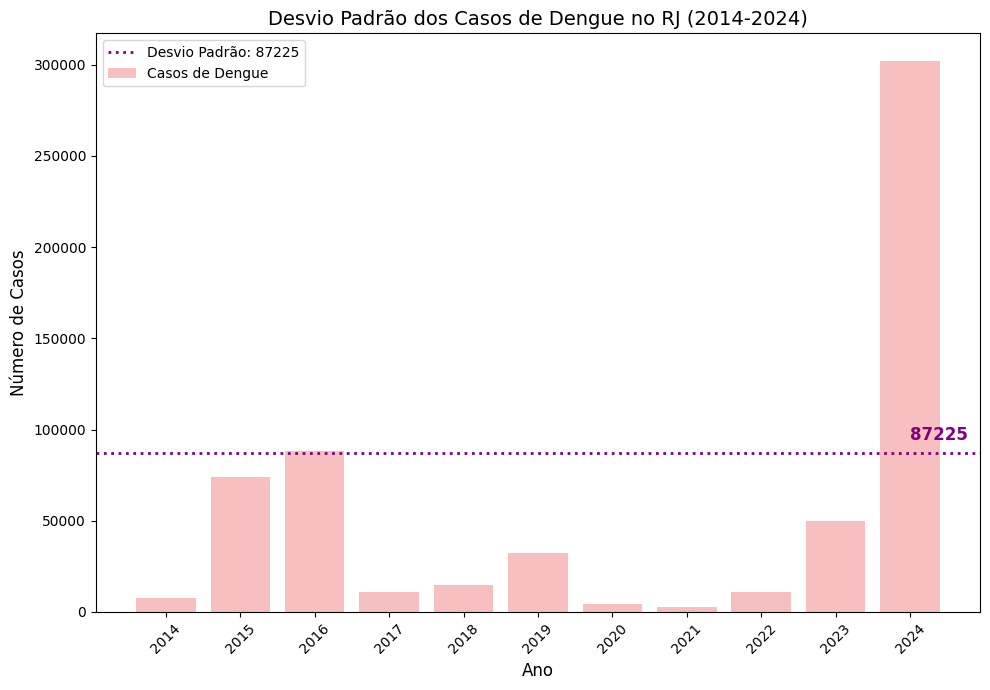

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

plt.rcParams["figure.figsize"] = (10, 7)


arquivo = "DadosDengueRJ.csv"
dados = pd.read_csv(arquivo, sep=";", encoding="latin1", skiprows=5)

dados.rename(columns={dados.columns[0]: "Ano"}, inplace=True)
coluna_total = dados.columns[-1]
tabela = dados[["Ano", coluna_total]].copy()
tabela.rename(columns={coluna_total: "Total_Casos"}, inplace=True)


tabela["Ano"] = pd.to_numeric(tabela["Ano"], errors="coerce")
tabela["Total_Casos"] = pd.to_numeric(tabela["Total_Casos"], errors="coerce")
tabela = tabela[(tabela["Ano"] >= 2014) & (tabela["Ano"] <= 2024)]


anos = pd.DataFrame({"Ano": range(2014, 2025)})
tabela = pd.merge(anos, tabela, on="Ano", how="left")
tabela["Total_Casos"] = tabela["Total_Casos"].fillna(0).astype(int)


media_casos = tabela["Total_Casos"].mean()
mediana_casos = tabela["Total_Casos"].median()
desvio_padrao = tabela["Total_Casos"].std()


X = tabela["Ano"].values.reshape(-1, 1)
y = tabela["Total_Casos"].values

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)


plt.figure(figsize=(10, 7))
plt.bar(tabela["Ano"], tabela["Total_Casos"], color='blue', label='Casos de Dengue')


for i, v in enumerate(tabela["Total_Casos"]):
    plt.text(tabela["Ano"].iloc[i], v + 5000, f"{v:,}".replace(",", "."), ha='center', va='bottom', fontweight='bold')


plt.plot(tabela["Ano"], y_pred, color='green', linestyle='-', linewidth=2, label='Linha de Regressão Linear')
plt.title('Casos de Dengue no RJ (2014-2024) com Linha de Regressão', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(tabela["Ano"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 7))
plt.plot(tabela["Ano"], tabela["Total_Casos"], marker='o', color='blue', linestyle='-', label='Casos de Dengue')


for i, v in enumerate(tabela["Total_Casos"]):
    plt.text(tabela["Ano"].iloc[i], v + 5000, f"{v:,}".replace(",", "."), ha='center', va='bottom', fontweight='bold')

plt.title('Tendência dos Casos de Dengue no RJ (2014-2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(tabela["Ano"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 7))
plt.bar(tabela["Ano"], tabela["Total_Casos"], color='lightblue', label='Casos de Dengue', alpha=0.5)


plt.axhline(media_casos, color='red', linestyle='-', linewidth=2, label=f'Média: {media_casos:.0f}')


plt.text(tabela["Ano"].iloc[-1], media_casos + 5000, f"{media_casos:.0f}", color='red', ha='left', va='bottom', fontweight='bold', fontsize=12)

plt.title('Média de Casos de Dengue no RJ (2014-2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(tabela["Ano"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 7))
plt.bar(tabela["Ano"], tabela["Total_Casos"], color='lightgreen', label='Casos de Dengue', alpha=0.5)


plt.axhline(mediana_casos, color='orange', linestyle='--', linewidth=2, label=f'Mediana: {mediana_casos:.0f}')


plt.text(tabela["Ano"].iloc[-1], mediana_casos + 5000, f"{mediana_casos:.0f}", color='orange', ha='left', va='bottom', fontweight='bold', fontsize=12)

plt.title('Mediana de Casos de Dengue no RJ (2014-2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(tabela["Ano"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 7))
plt.bar(tabela["Ano"], tabela["Total_Casos"], color='lightcoral', label='Casos de Dengue', alpha=0.5)


plt.axhline(desvio_padrao, color='purple', linestyle=':', linewidth=2, label=f'Desvio Padrão: {desvio_padrao:.0f}')


plt.text(tabela["Ano"].iloc[-1], desvio_padrao + 5000, f"{desvio_padrao:.0f}", color='purple', ha='left', va='bottom', fontweight='bold', fontsize=12)

plt.title('Desvio Padrão dos Casos de Dengue no RJ (2014-2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(tabela["Ano"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
